# Custom dataset - 2 classes (daisy and Dandilion)

This architecture is a simple feedforward neural network designed for image classification tasks with two classes. The model takes RGB images of size 256x256 and outputs probability scores for each class using the softmax function.

In [1]:
#!pip install scikit-learn
#!pip install numpy
#!pip install matplotlib

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
from torchvision.datasets import ImageFolder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Set random seed for reproducibility
torch.manual_seed(10)


In [3]:
# Define the neural network architecture
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(3 * 256 * 256, 128)  # Assuming input images are RGB and 256x256
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 2)  # Output layer with 2 classes
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = x.view(-1, 3 * 256 * 256)  # Flatten the input images (reshapes the input tensor to have a size of (batch_size, 3 * 256 * 256)
        x = self.relu(self.fc1(x))
        x = self.softmax(self.fc2(x))
        return x


In [4]:
# Set up data transformations
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [5]:
# Define custom dataset class
class CustomDataset(Dataset):
    def __init__(self, root, transform=None):
        self.dataset = ImageFolder(root, transform=transform)  #This ensures that every image in the dataset is resized, converted to a tensor, and normalized before being used in the training or testing process.

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        return self.dataset[idx]


In [6]:
# Define data loaders
train_dataset = CustomDataset(root='Flowers_Classification_dataset/train', transform=transform)
test_dataset = CustomDataset(root='Flowers_Classification_dataset/val', transform=transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

In [7]:
# Instantiate the model, loss function, and optimizer
model = SimpleNN()
criterion = nn.CrossEntropyLoss()
#optimizer = optim.Adam(model.parameters(), lr=0.0001)


# Optimizers to compare
optimizers = {
    'SGD': optim.SGD(model.parameters(), lr=0.0001, momentum=0.9),
    'Adam': optim.Adam(model.parameters(), lr=0.0001),
    'RMSprop': optim.RMSprop(model.parameters(), lr=0.0001)
    # Add any other optimizers you want to compare
}


Training with SGD
Epoch [1/50], Training Loss: 0.6041, Validation Loss: 0.6732
Epoch [2/50], Training Loss: 0.6036, Validation Loss: 0.6726
Epoch [3/50], Training Loss: 0.6036, Validation Loss: 0.6710
Epoch [4/50], Training Loss: 0.6029, Validation Loss: 0.6725
Epoch [5/50], Training Loss: 0.6034, Validation Loss: 0.6720
Epoch [6/50], Training Loss: 0.6027, Validation Loss: 0.6751
Epoch [7/50], Training Loss: 0.6024, Validation Loss: 0.6747
Epoch [8/50], Training Loss: 0.6022, Validation Loss: 0.6762
Epoch [9/50], Training Loss: 0.6020, Validation Loss: 0.6761
Epoch [10/50], Training Loss: 0.6017, Validation Loss: 0.6760
Epoch [11/50], Training Loss: 0.6018, Validation Loss: 0.6756
Epoch [12/50], Training Loss: 0.6021, Validation Loss: 0.6749
Epoch [13/50], Training Loss: 0.6017, Validation Loss: 0.6756
Epoch [14/50], Training Loss: 0.6023, Validation Loss: 0.6751
Epoch [15/50], Training Loss: 0.6019, Validation Loss: 0.6756
Epoch [16/50], Training Loss: 0.6013, Validation Loss: 0.6751

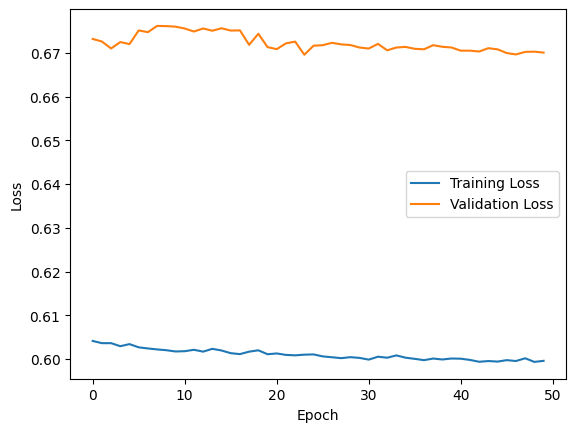

Training with Adam
Epoch [1/50], Training Loss: 0.6051, Validation Loss: 0.6820
Epoch [2/50], Training Loss: 0.6156, Validation Loss: 0.6761
Epoch [3/50], Training Loss: 0.6015, Validation Loss: 0.6644
Epoch [4/50], Training Loss: 0.6046, Validation Loss: 0.6788
Epoch [5/50], Training Loss: 0.6001, Validation Loss: 0.6696
Epoch [6/50], Training Loss: 0.5931, Validation Loss: 0.6652
Epoch [7/50], Training Loss: 0.5908, Validation Loss: 0.6596
Epoch [8/50], Training Loss: 0.5939, Validation Loss: 0.6511
Epoch [9/50], Training Loss: 0.5813, Validation Loss: 0.6610
Epoch [10/50], Training Loss: 0.5875, Validation Loss: 0.6656
Epoch [11/50], Training Loss: 0.5769, Validation Loss: 0.6760
Epoch [12/50], Training Loss: 0.5893, Validation Loss: 0.6814
Epoch [13/50], Training Loss: 0.5788, Validation Loss: 0.6494
Epoch [14/50], Training Loss: 0.5786, Validation Loss: 0.6414
Epoch [15/50], Training Loss: 0.5735, Validation Loss: 0.6592
Epoch [16/50], Training Loss: 0.5865, Validation Loss: 0.659

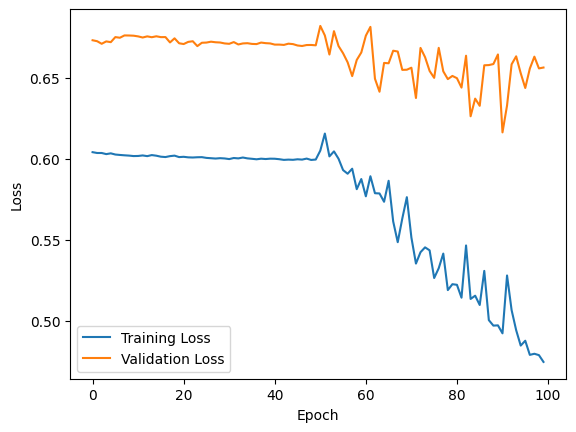

Training with RMSprop
Epoch [1/50], Training Loss: 0.4749, Validation Loss: 0.6466
Epoch [2/50], Training Loss: 0.4712, Validation Loss: 0.6533
Epoch [3/50], Training Loss: 0.4644, Validation Loss: 0.6377
Epoch [4/50], Training Loss: 0.4678, Validation Loss: 0.6539
Epoch [5/50], Training Loss: 0.4626, Validation Loss: 0.6630
Epoch [6/50], Training Loss: 0.4685, Validation Loss: 0.6390
Epoch [7/50], Training Loss: 0.4565, Validation Loss: 0.6528
Epoch [8/50], Training Loss: 0.4666, Validation Loss: 0.6690
Epoch [9/50], Training Loss: 0.4516, Validation Loss: 0.6550
Epoch [10/50], Training Loss: 0.4545, Validation Loss: 0.6516
Epoch [11/50], Training Loss: 0.4493, Validation Loss: 0.6572
Epoch [12/50], Training Loss: 0.4446, Validation Loss: 0.6426
Epoch [13/50], Training Loss: 0.4435, Validation Loss: 0.6517
Epoch [14/50], Training Loss: 0.4432, Validation Loss: 0.6495
Epoch [15/50], Training Loss: 0.4431, Validation Loss: 0.6570
Epoch [16/50], Training Loss: 0.4339, Validation Loss: 0.

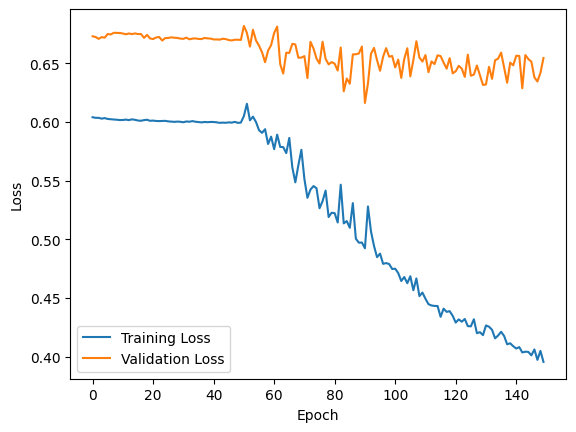

In [9]:
# Training the model
num_epochs = 50
train_losses = []
valid_losses = []


for name, optimizer in optimizers.items():
    print(f"Training with {name}")
    
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
    
        average_train_loss = running_loss / len(train_loader)
        train_losses.append(average_train_loss)
    
        # Validation
        model.eval()
        valid_loss = 0.0
        with torch.no_grad():
            for inputs, labels in test_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                valid_loss += loss.item()
    
        average_valid_loss = valid_loss / len(test_loader)
        valid_losses.append(average_valid_loss)
    
        print(f'Epoch [{epoch + 1}/{num_epochs}], '
              f'Training Loss: {average_train_loss:.4f}, '
              f'Validation Loss: {average_valid_loss:.4f}')
    
    # Evaluate the model
    def evaluate_model(model, data_loader):
        model.eval()
        all_preds = []
        all_labels = []
    
        with torch.no_grad():
            for inputs, labels in data_loader:
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())
    
        accuracy = accuracy_score(all_labels, all_preds)
        precision = precision_score(all_labels, all_preds, average='weighted')
        recall = recall_score(all_labels, all_preds, average='weighted')
        f1 = f1_score(all_labels, all_preds, average='weighted')
    
        print(f'Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')
    
    evaluate_model(model, test_loader)
    
    # Visualize training and validation curves
    plt.plot(train_losses, label='Training Loss')
    plt.plot(valid_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    # Save the trained model
    torch.save(model.state_dict(), 'binary_classification_model.pth')
